In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
imgGray = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/2- 2D-scaling-Transformation/images/albert-einstein-gray.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
numRows = imgGray.shape[0]
numCols = imgGray.shape[1]

In [22]:
def f_bilinearInterpolate(r, c, I):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]: # check interpolation pt is in the image
        a = wl * I[tr, lc] + wr * I[tr, rc]
        b = wl * I[br, lc] + wr * I[br, rc]
        g = a * wb + b * wt
        return np.uint8(g)
    else:
        return 0

In [28]:
def f_getExtentsAffine(T,rMax,cMax):
    Cords = np.array([[0,0,1],[0,cMax-1,1],[rMax-1,0,1],[rMax-1,cMax-1,1]])
    A_dash = T.dot(Cords.T)
    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1, maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [31]:
def f_transformAffine(T,I_gray):
    rMax,cMax = I_gray.shape[0],I_gray.shape[1]
    minR,minC,maxR,maxC,H,W = f_getExtentsAffine(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    Tinv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j, 1])
            P = Tinv.dot(P_dash)
            i , j = P[0] , P[1]
            if i < 0 or i>=numRows or j<0 or j>=numCols:
                pass
            else:
                g = f_bilinearInterpolate(i,j,I_gray)
                I2[new_i-minR,new_j-minC] = g
    return I2

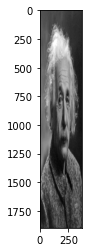

In [33]:
T = np.array([[2, 0, 10], [0, 0.5, 20], [0, 0, 1]])
I = f_transformAffine(T, imgGray)
plt.imshow(I, cmap='gray')

### Quiz
Can you Rotate and Translate image at the same time?

### Rotation about any point by homogeneous matrix

In [46]:
A

array([[  0.91923882,  -0.45961941, 208.07611845],
       [  0.49497475,   0.74246212, -45.47727215],
       [  0.        ,   0.        ,   1.        ]])

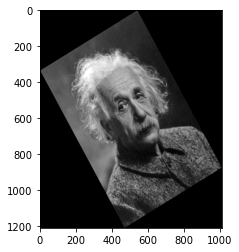

In [47]:
I2 = f_transformAffine(A, imgGray)
plt.imshow(I2, cmap='gray')

### Quiz: Reflection of image about a line

In [52]:
a = -45
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))

T = np.array([[1, 0, -2], [0, 1, 0], [0, 0, 1]])
R = np.array([[ca, -sa, 0], [sa, ca, 0], [0, 0, 1]])
Rf = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])

A = np.linalg.inv(T).dot(np.linalg.inv(R)).dot(Rf).dot(R).dot(T)
A

array([[ 2.22044605e-16,  1.00000000e+00,  2.00000000e+00],
       [ 1.00000000e+00, -2.22044605e-16, -2.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

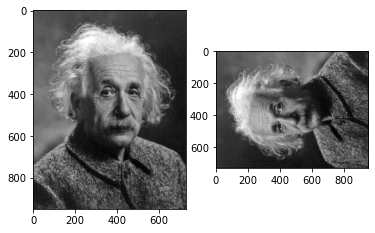

In [53]:
img = f_transformAffine(A, imgGray)
plt.subplot(121)
plt.imshow(imgGray, cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')

### Transformation Matrix Properties

In [54]:
a = -45
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca, -sa], [sa, ca]])

In [55]:
np.linalg.det(R)

1.0

In [56]:
np.linalg.inv(R)

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [57]:
R.T

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [58]:
Rf = R[[1, 0], :]

In [59]:
Rf

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [60]:
np.linalg.det(Rf)

-1.0

In [61]:
Rf.T

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [62]:
np.linalg.inv(Rf)

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [64]:
Rf

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

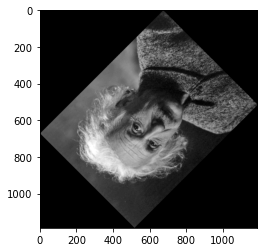

In [65]:
A = np.array([[Rf[0, 0], Rf[0, 1], 0], [Rf[1, 0], Rf[1, 1], 0], [0, 0, 1]])
I2 = f_transformAffine(A, imgGray)
plt.imshow(I2, cmap='gray')